In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from scipy.stats import kde
data = pd.read_csv("50_Startups.csv")
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


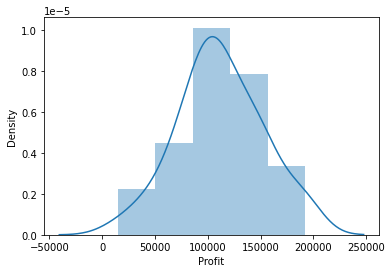

In [ ]:
sns.distplot(data['Profit'],bins=5,kde=True)


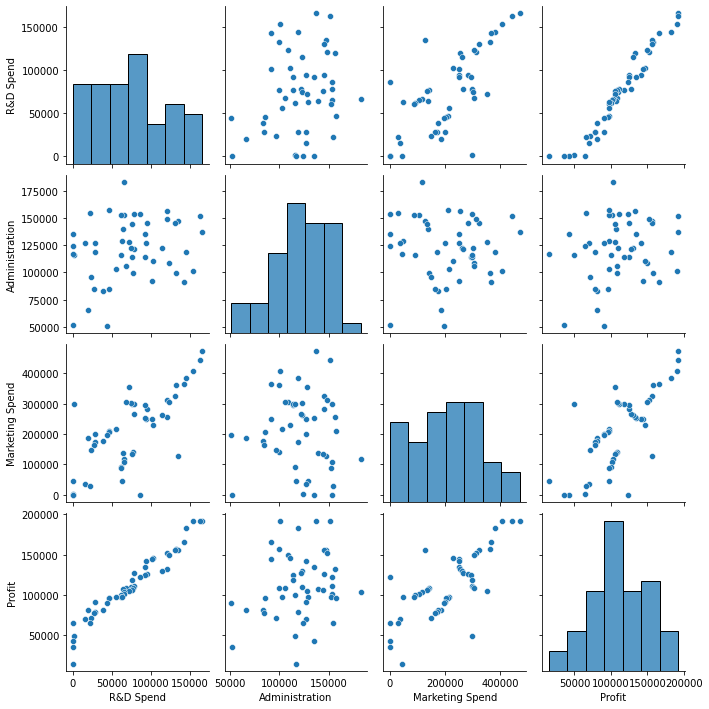

In [ ]:
sns.pairplot(data)

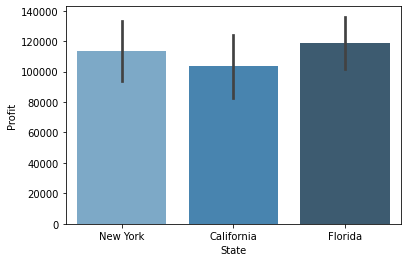

In [ ]:
sns.barplot(x='State',y='Profit',data=data, palette="Blues_d")

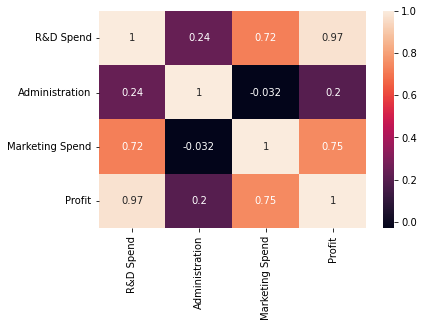

In [ ]:
sns.heatmap(data.corr(), annot=True)

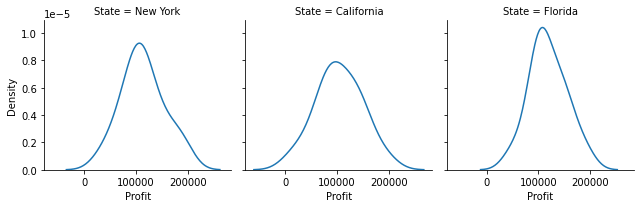

In [ ]:
g=sns.FacetGrid(data, col='State')
g=g.map(sns.kdeplot,'Profit')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,3]= labelencoder.fit_transform(data.iloc[:,3].values)
print(data['State'].unique())

[2 0 1]


In [ ]:
print(data.head(10))

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94
5  131876.90        99814.71        362861.36      2  156991.12
6  134615.46       147198.87        127716.82      0  156122.51
7  130298.13       145530.06        323876.68      1  155752.60
8  120542.52       148718.95        311613.29      2  152211.77
9  123334.88       108679.17        304981.62      0  149759.96


In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 4].values

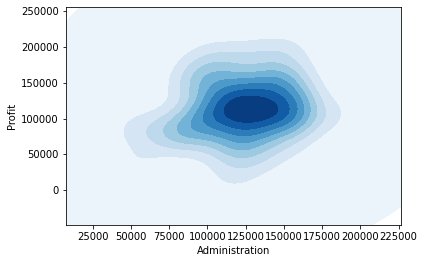

In [ ]:
sns.kdeplot(x=data.Administration, y=data.Profit, cmap="Blues", shade=True, thresh=0)
plt.show()

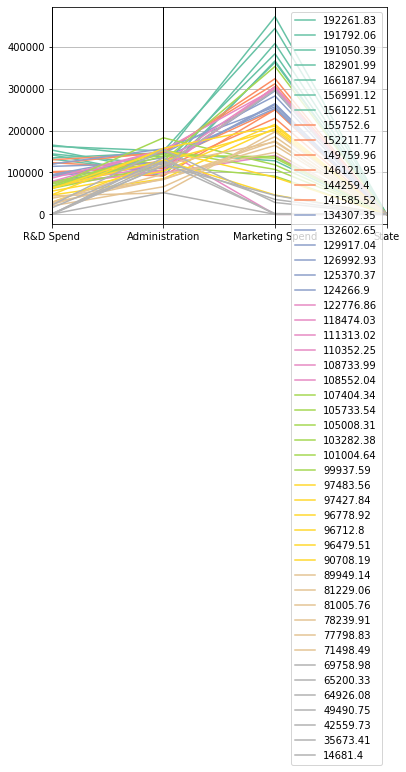

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data, 'Profit', colormap=plt.get_cmap("Set2"))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print('Coefficients: \n', regressor.coef_) 
regressor.score(X_train, Y_train)

Y_pred = regressor.predict(X_test)
print("Predicted accuray or the socre of the dataset",regressor.score(X_train, Y_train)*100)
print(Y_pred)

Coefficients: 
 [7.77203690e-01 3.02432445e-02 3.49236072e-02 3.15877202e+02]
Predicted accuray or the socre of the dataset 95.00009880362248
[103959.40508021 132398.73236694 133529.03790148  72958.28368314
 179534.78737166 115533.62584099  67476.95847883  98504.36199396
 114789.16083781 168972.21909945]


In [ ]:
df = pd.DataFrame(data={'Predicted value':Y_pred.flatten(),'Actual Value':Y_test.flatten()})
df

,Predicted value,Actual Value
0,103959.405080,103282.38
1,132398.732367,144259.40
2,133529.037901,146121.95
3,72958.283683,77798.83
4,179534.787372,191050.39
5,115533.625841,105008.31
6,67476.958479,81229.06
7,98504.361994,97483.56
8,114789.160838,110352.25
9,168972.219099,166187.94


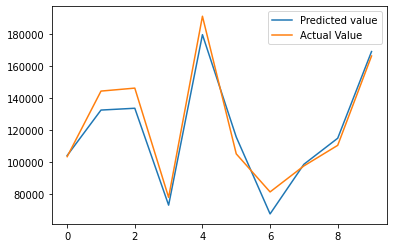

In [ ]:

df.plot(kind='line')

#https://github.com/namanskshetty

plt.show()